[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RelevanceAI/workflows/blob/main/workflows/dr/Reduce_the_Dimensions_of_Your_Data_with_Relevance_AI.ipynb)

# Instructions

1. Copy and paste the token provided from the 'Dimensionality Reduction' Workflow dashboard.
2. Click the ▶️  on the left or go to "Runtime" -> "Run All" and click "Run anyway" on the warning that pops up.
3. You should see a progress bar underneath the form, keep this window opened and active until the progress bar is complete otherwise it'll terminate.

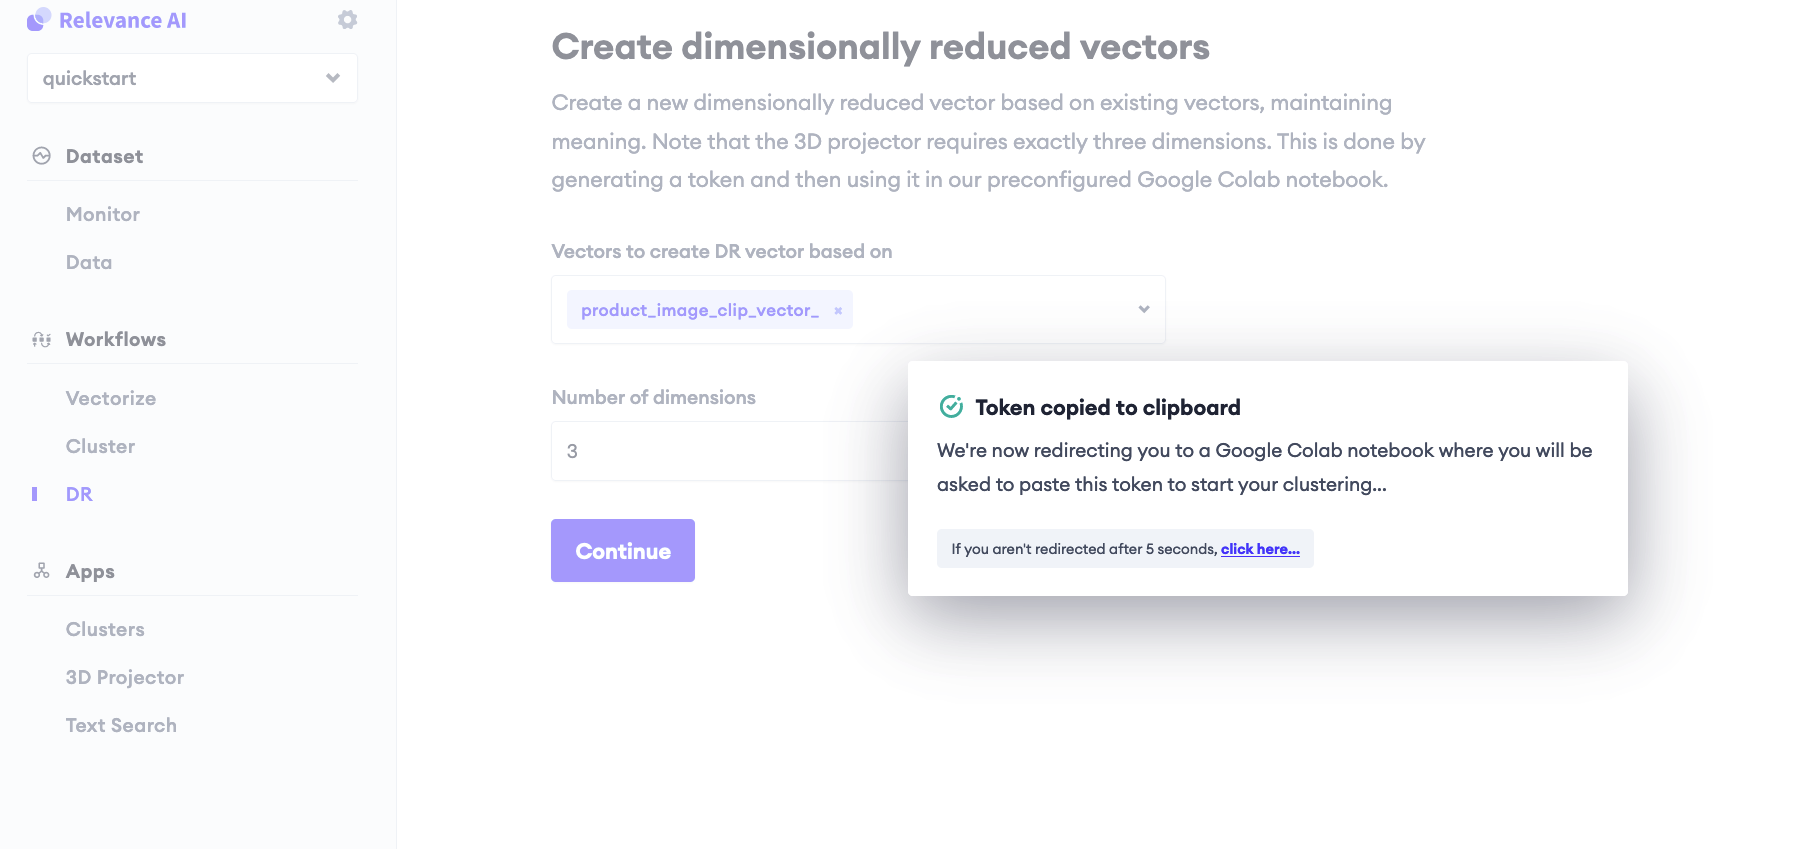


In [ ]:
#@title Paste token below and press ▶️  button to the left of this title { display-mode: "form" }
# %tb

token = "" #@param {type:"string"}


show_warnings_in_logs = False #@param {type:"boolean"}
#@markdown Once the form is filled and you've clicked run, monitor below for logs of it running

import base64
import json

config = json.loads(base64.b64decode(token + "==="))

import subprocess

def install_package(package):
    process = subprocess.Popen(['pip', 'install', package],
                        stdout=subprocess.PIPE, 
                        stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    return

!pip install -q RelevanceAI[umap]==2.1.5
print("Installing RelevanceAI")

import contextlib

class DevNull:
    def write(self, msg):
        pass


## Instantiate client ###
from relevanceai import Client 
client = Client(token=config['authorizationToken'])

## Checking valid vector field ###
for v in config['vector_fields']:
  if not '_vector_'in v:
    raise ValueError(f"'{v}' is not a valid vector field")


## Instantiate client ###
try:
  dataset_id = config['dataset_id']
  ds = client.Dataset(dataset_id)
  
  dr_method = 'umap'  
  ds.reduce_dims(alias=f"{dr_method}-{config['n_dims']}", model=dr_method, n_components=config['n_dims'], vector_fields=config['vector_fields'])

except Exception as e:
    print(e)
    raise ValueError(f'Incorrect token provided. {json.dumps(config, indent=2)}')


print(f"Finished reducing the selected vector dimension to {config['n_dims']} using {dr_method}, you may close this window.")